In [46]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from statsmodels.miscmodels.ordinal_model import OrderedModel
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [2]:
df=pd.read_csv('whitewines_cleaned.csv')

First Create the two columns for the two logistic regressions

In [3]:
df['first']=(df['merged']>0).astype(int)

In [4]:
df['second']=(df['merged']>1).astype(int)

In [5]:
df

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,merged,first,second
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8,6,1,1,0
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5,6,1,1,0
2,2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1,6,1,1,0
3,3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,6,1,1,0
4,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,6,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4887,4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,3.27,0.50,11.2,6,1,1,0
4888,4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,3.15,0.46,9.6,5,0,0,0
4889,4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,2.99,0.46,9.4,6,1,1,0
4890,4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,3.34,0.38,12.8,7,2,1,1


### parallel model

Now we can apply the two regressions

First regression with a train size of 0.7

In [6]:
col=df.columns.to_list()
#col.remove(['Unnamed: 0','merged','first','second'])
col_list = [e for e in col if e not in ('Unnamed: 0','merged','first','second','quality')]
col_list

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'pH',
 'sulphates',
 'alcohol']

In [7]:
X=df[col_list]
Y=df['first']

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,random_state=1)

In [9]:
log1=LogisticRegression(max_iter=450)
log1.fit(X_train,Y_train)

LogisticRegression(max_iter=450)

In [10]:
predictions=log1.predict(X_test)
cm=confusion_matrix(Y_test,predictions)
print (cm)

[[236 221]
 [131 880]]


In [11]:
df_pred=X_test
df_pred['Y>0 true']=Y_test
df_pred['Y>0 predicted']=predictions

<ipython-input-11-4f0c63865acd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred['Y>0 true']=Y_test
<ipython-input-11-4f0c63865acd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred['Y>0 predicted']=predictions


In [12]:
df_pred

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,Y>0 true,Y>0 predicted
2975,6.1,0.38,0.42,5.0,0.016,31.0,113.0,3.15,0.31,12.400000,1,1
219,7.5,0.23,0.36,7.0,0.036,43.0,161.0,3.04,0.32,11.000000,0,1
2046,11.8,0.23,0.38,11.1,0.034,15.0,123.0,2.93,0.55,9.700000,0,0
2739,6.7,0.27,0.33,3.6,0.034,9.0,45.0,3.08,0.40,10.500000,1,1
3015,8.4,0.32,0.35,11.7,0.029,3.0,46.0,3.02,0.34,11.800000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4632,6.0,0.24,0.41,1.3,0.036,42.0,118.0,3.04,0.64,11.733333,1,1
3393,6.1,0.33,0.32,7.8,0.052,52.0,183.0,3.39,0.65,9.500000,0,1
4708,6.4,0.28,0.28,3.0,0.040,19.0,98.0,3.25,0.47,11.100000,1,1
3323,6.4,0.24,0.29,1.0,0.038,18.0,122.0,3.30,0.42,11.500000,0,1


Now we are going to apply the second logistic regression for the variable Y>1

In [13]:
X=df[col_list]
Y=df['second']

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,random_state=1)

In [15]:
log2=LogisticRegression(max_iter=1000)
log2.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [16]:
predictions=log2.predict(X_test)
cm=confusion_matrix(Y_test,predictions)
print (cm)

[[1088   49]
 [ 245   86]]


In [17]:
df_pred['Y>1 true']=Y_test
df_pred['Y>1 predicted']=predictions

We first check whether there are some data predicted as <1 and >1

In [18]:
df_pred[(df_pred['Y>0 predicted']==0) & (df_pred['Y>1 predicted']==1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,Y>0 true,Y>0 predicted,Y>1 true,Y>1 predicted


As we can notice this is not the case

In [19]:
df_pred['final_predictions']=(df_pred['Y>0 predicted']==1).astype(int)+(df_pred['Y>1 predicted']==1).astype(int)
df_pred

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,Y>0 true,Y>0 predicted,Y>1 true,Y>1 predicted,final_predictions
2975,6.1,0.38,0.42,5.0,0.016,31.0,113.0,3.15,0.31,12.400000,1,1,1,0,1
219,7.5,0.23,0.36,7.0,0.036,43.0,161.0,3.04,0.32,11.000000,0,1,0,0,1
2046,11.8,0.23,0.38,11.1,0.034,15.0,123.0,2.93,0.55,9.700000,0,0,0,0,0
2739,6.7,0.27,0.33,3.6,0.034,9.0,45.0,3.08,0.40,10.500000,1,1,0,0,1
3015,8.4,0.32,0.35,11.7,0.029,3.0,46.0,3.02,0.34,11.800000,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4632,6.0,0.24,0.41,1.3,0.036,42.0,118.0,3.04,0.64,11.733333,1,1,0,0,1
3393,6.1,0.33,0.32,7.8,0.052,52.0,183.0,3.39,0.65,9.500000,0,1,0,0,1
4708,6.4,0.28,0.28,3.0,0.040,19.0,98.0,3.25,0.47,11.100000,1,1,0,0,1
3323,6.4,0.24,0.29,1.0,0.038,18.0,122.0,3.30,0.42,11.500000,0,1,0,0,1


In [20]:
true_val=df['merged']

In [21]:
df_pred=pd.merge(df_pred,true_val,left_index=True, right_index=True)

In [22]:
cm=confusion_matrix(df_pred['merged'],df_pred['final_predictions'])
print (cm)

[[236 218   3]
 [117 517  46]
 [ 14 231  86]]


### Let's try with the parallel model

In [23]:
Y=df['merged']

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.70, random_state=1)
mod_log = OrderedModel(Y_train,X_train,distr='logit')

In [25]:
res_log = mod_log.fit()
res_log.summary()

/Applications/anaconda/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                 merged   Log-Likelihood:                -3196.3
Model:                   OrderedModel   AIC:                             6417.
Method:            Maximum Likelihood   BIC:                             6490.
Date:                Sat, 11 Dec 2021                                         
Time:                        16:07:50                                         
No. Observations:                3424                                         
Df Residuals:                    3412                                         
Df Model:                          12                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity           -0.3465      0.048     -7.282      0.000      -0.440      -0.253
volatile acidity        -0.0762      0.361     -0.211      0.833      -0.784       0.631
citric acid              0.1166      0.303      0.385      0.700      -0.477       0.710
residual sugar           0.0343      0.008      4.206      0.000       0.018       0.050
chlorides                0.1269      1.756      0.072      0.942      -3.315       3.569
free sulfur dioxide      0.0190      0.003      7.146      0.000       0.014       0.024
total sulfur dioxide    -0.0049      0.001     -4.249      0.000      -0.007      -0.003
pH                      -0.5188      0.257     -2.020      0.043      -1.022      -0.015
sulphates                0.0724      0.306      0.237      0.813      -0.527       0.672
alcohol                  0.8078      0.038     21.226      0.000       0.733       0.882
0/1                      3.9193      1.093      3.584      0.000       1.776       6.062
1/2                      0.8776      0.024     37.136      0.000       0.831       0.924
========================================================================================
"""

In [26]:
predicted = res_log.model.predict(res_log.params, exog=X_test)

/Applications/anaconda/anaconda3/lib/python3.8/site-packages/statsmodels/miscmodels/ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


In [27]:
predictions=pd.DataFrame(predicted)

In [28]:
predictions

,0,1,2
0,0.068721,0.381080,0.550199
1,0.246138,0.537282,0.216580
2,0.825212,0.156028,0.018760
3,0.316392,0.520410,0.163197
4,0.195399,0.533635,0.270967
...,...,...,...
1463,0.095047,0.442760,0.462193
1464,0.421489,0.468278,0.110233
1465,0.234608,0.537905,0.227487
1466,0.218252,0.537429,0.244318


In [29]:
pred=predictions.idxmax(axis=1)

In [30]:
pred=pred.to_frame().rename(columns={0: 'Parallel_pred'})

In [31]:
df_pred=df_pred.reset_index()

In [32]:
df_pred=pd.merge(df_pred,pred,left_index=True, right_index=True)

In [33]:
cm=confusion_matrix(df_pred['merged'],df_pred['Parallel_pred'])
print (cm)

[[260 189   8]
 [176 431  73]
 [ 39 184 108]]


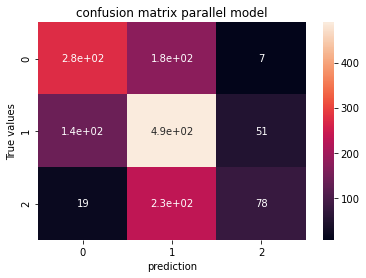

In [53]:
sn.heatmap(cm,annot=True)
plt.xlabel('prediction')
plt.ylabel('True values')
plt.title('confusion matrix parallel model')
plt.show()

Parallel model accuracy

In [35]:
(260+431+108)/1468

0.5442779291553134

In [55]:
cm=confusion_matrix(df_pred['merged'],df_pred['final_predictions'])
print (cm)

[[236 218   3]
 [117 517  46]
 [ 14 231  86]]


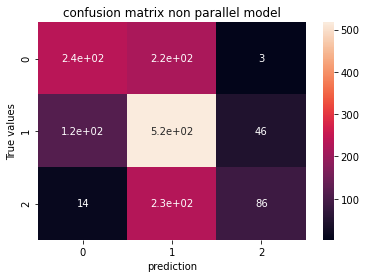

In [56]:
sn.heatmap(cm,annot=True)
plt.xlabel('prediction')
plt.ylabel('True values')
plt.title('confusion matrix non parallel model')
plt.show()

Non parallel model accuracy

In [38]:
(236+517+86)/1468

0.5715258855585831

Accuracy is quite similar, but as expected the accuracy of the non parallel model is better, additionally we can notice that there is a higher percentage of data in the parallel model that are strongly wrong 

Anyway we can observe that both the models tend to predict more values as 1 because in an ordered model is better not to predict wrongly 1 instead of 3 and viceversa

### multinomial logistic regression

In [39]:
multilog = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000)

In [40]:
Y=df['merged']

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.70, random_state=1)

In [42]:
multilog.fit(X_train,Y_train)

/Applications/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [43]:
predictions=multilog.predict(X_test)

In [44]:
cm=confusion_matrix(Y_test,predictions)
print (cm)

[[275 175   7]
 [140 489  51]
 [ 19 234  78]]


Accuracy of this model

In [45]:
(275+489+78)/1468

0.5735694822888283

As we can notice the accuracy is also higher than the other accuracy, but this is not the unique parameter to evaluate the model in our case in fact in an ordered model is also important to see how are the errors, while in a multinomial regression the unique aim is to predict the right class.